In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import time

In [11]:
T = 0.1
Nscale = 0
L = 300
M = 9000
N = 1
x = np.linspace(-L, L, M + 1)
dx = 2*L/M
dt = T/(N + 1)
#---------------------------------------------------------
#time_seconds = np.log(N) * M**3 * 1.8e-10
time_seconds = N * M**2 * 1.6e-7
hours = int(time_seconds // 3600)
minutes = int((time_seconds % 3600) // 60)
seconds = int(time_seconds % 60)
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
print(f"Estimated time: {hours}h {minutes}min {seconds}s")

(T=0.1, L=300, M=9000, N=1, (Nscale=0))
Estimated time: 0h 0min 12s


In [12]:
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
k0 = 1
m = 1
psi_0 = (2 / np.pi)**(1/4) * np.exp(- x**2 + 1j * k0 * x)
'''
K = []
for xi in x:
    Ki = []
    for xj in x:
        Kij = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (xi - xj)**2/dt))
        Ki.append(Kij)
    K.append(Ki)
K = np.array(K)
'''
# Assuming x is a NumPy array
x = np.asarray(x)
X_i, X_j = np.meshgrid(x, x, indexing='ij')
K = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (X_i - X_j)**2 / dt))
#print(f'condition(K) = {np.linalg.cond(K)}')

run_time_start = time.time()
#KpowerN = K
#for i in range(N):
#    KpowerN = KpowerN @ K # K^{N + 1}
KpowerN = np.linalg.matrix_power(K, N+1)
run_time_end = time.time()

psi_final = dx**(N + 1) * KpowerN @ psi_0

print(f't/complexity = {(run_time_end-run_time_start)/(np.log(N) * M**3)}')
#print(f't/complexity = {(run_time_end-run_time_start)/(N * M**2)}')
np.save('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy', psi_final)

(T=0.1, L=300, M=9000, N=1, (Nscale=0))
t/complexity = inf


C:\Users\siyang\AppData\Local\Temp\ipykernel_10848\1276014990.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  print(f't/complexity = {(run_time_end-run_time_start)/(np.log(N) * M**3)}')


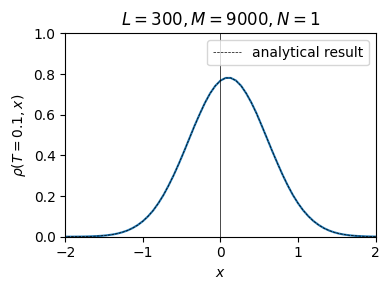

A = 2.259050 * 10^(2)


In [13]:
load = 0
if load == 0:
    psi_final = np.load('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy')
else: # load == 1
    psi_final = np.load('data/(T=0.1, L=300.0, M=9001, N=4, (Nscale=30)) - psi_final.npy')
    T=0.1
    L=300
    M=9001-1
    N=4

rho_final = (psi_final.real)**2 + (psi_final.imag)**2
xmax = 2
x = np.linspace(-L, L, M+1)
dx = 2*L/M
rho_renormalized = []
for i in range(len(psi_final)):
    if x[i] + dx > - xmax and x[i] - dx < xmax:
        rho_renormalized.append(rho_final[i])
    else:
        rho_renormalized.append(0)
rho_renormalized = np.array(rho_renormalized)
A = sum(rho_renormalized) * dx
rho_renormalized = rho_renormalized / A
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, rho_renormalized)
psi_analytically = (2/np.pi)**(1/4) * np.sqrt(m/(m + 1j * 2 * T)) * np.exp(m/(m + 1j * 2 * T) * (- x**2 + 1j * k0 * x) - 1j * k0**2 / (2 * (m + 1j * 2 * T)) * T)
rho_analytically = (psi_analytically.real)**2 + (psi_analytically.imag)**2
ax.plot(x, rho_analytically, linestyle='--', linewidth=0.5, color='black', label='analytical result')
ax.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax.set_title('$L = '+f'{L}'+', M = '+f'{M}'+', N = '+f'{N}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$\\rho(T = '+f'{T}'+', x)$')
ax.set_xlim(-xmax, xmax)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.savefig('path integral numerically (normalized) of a free particle with initial state as a Gaussian wave packet and T='+f'{T}'+' (L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+').pdf', format='pdf')
plt.show()

Ascale = int(np.log(rho_final[int(M/2)])/np.log(10))
print(f'A = {(rho_final[int(M/2)] / 10**Ascale):1f} * 10^({Ascale})')